In [82]:
import tensorflow as tf
import numpy as np
from PIL import Image
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
#Loading images from data
PATH = "C:/Users/Lenovo/Desktop/AI/AI_Project/data/"
data_dir = Path(PATH)
image_num = len(list(data_dir.glob('*/*.jpg')))

In [84]:
image_num


5110

In [85]:
image_csv = pd.read_csv(PATH+'Raw_Data_JPG.csv')
CLASS_NAME = image_csv.Diagnosis.unique()

In [86]:
CLASS_NAME

array(['No Finding', 'TB', 'Heart', 'CA lung', 'Intra', 'Extra'],
      dtype=object)

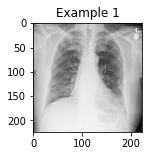

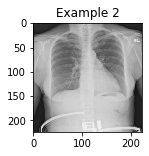

In [87]:
example_NoF = list(data_dir.glob('1_No_Finding/*.jpg'))
i = 1
for n in example_NoF[:2]:
    ex = Image.open(n)
    ex_ar = np.asarray(ex)
    plt.figure(figsize=(5,2))
    word = "Example "+ str(i)
    plt.title(word)
    plt.imshow(ex_ar)
    i+=1

In [98]:
#Preproccsing image data into ImageDataGenerator
my_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_WIDTH = 224
IMG_HEIGHT = 224
STEP_PER_EPOCH = np.ceil(image_num/BATCH_SIZE)

In [106]:
#This will be my train_set . 
data_gen = my_generator.flow_from_directory(directory=PATH,batch_size=BATCH_SIZE,shuffle=True,target_size=(IMG_HEIGHT,IMG_WIDTH),classes = list(CLASS_NAME))

Found 5110 images belonging to 6 classes.


In [107]:
img_batch,label_batch = next(data_gen)

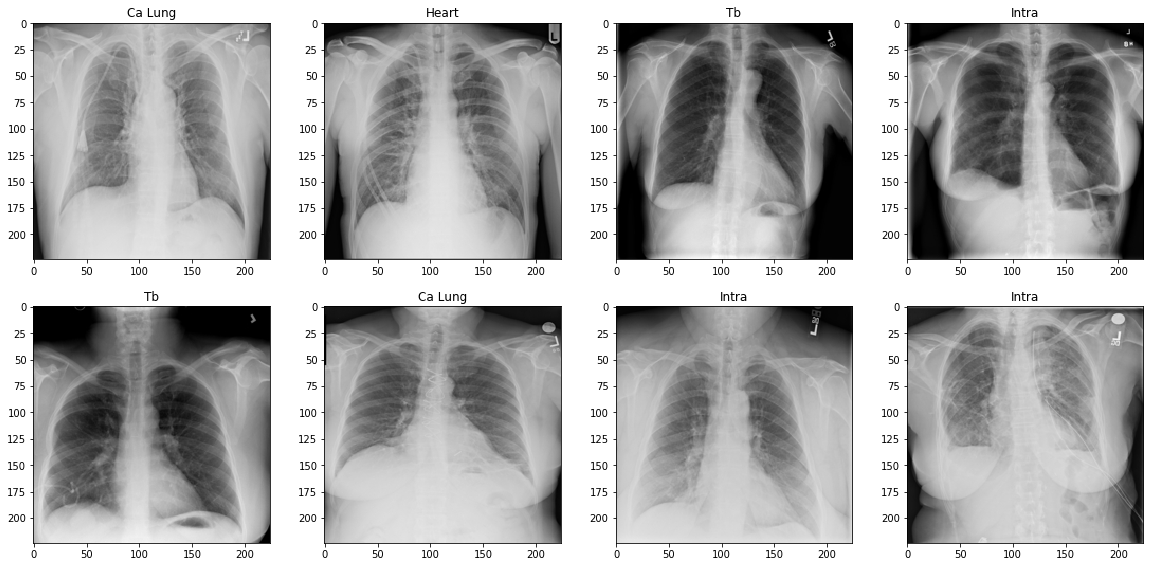

In [115]:
plt.figure(figsize=(20,20))
for n in range(8):
    plt.subplot(4,4,n+1)
    plt.title(CLASS_NAME[label_batch[n]==1][0].title())
    plt.imshow(img_batch[n])

In [123]:
#Try to load InceptionV3
myInception = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=6)

In [133]:
#myInception.summary()